In [1]:
#LINEAR REGRESSION

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('sers.csv')

# One-Hot Encode categorical columns (if any)
data = pd.get_dummies(data, drop_first=True)

# Split features and target variable
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing (Scaling)
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_processed)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Print the results
print("📈 Linear Regression Performance:")
print(f"R² Score: {r2_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

📈 Linear Regression Performance:
R² Score: -0.2503
MAE: 0.0532
RMSE: 0.1443


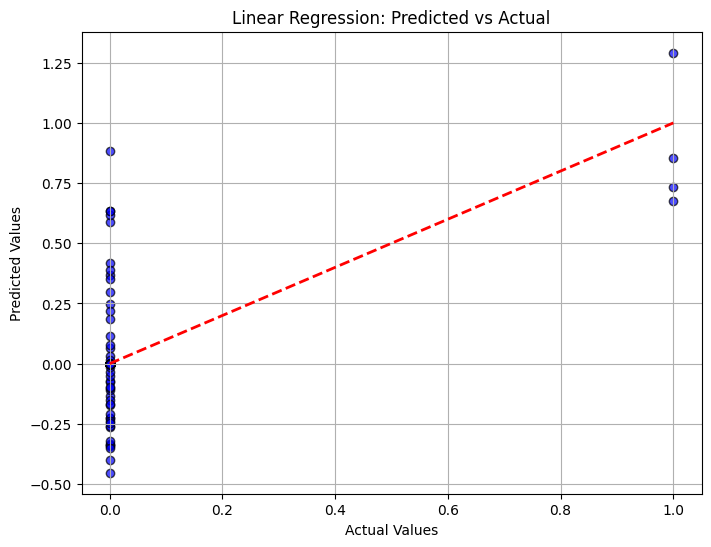

In [4]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

In [5]:
# POLYNOMIAL REGRESSION

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('sers.csv')  # Replace 'sers.csv' with your file path

# One-Hot Encode categorical columns (if any)
data = pd.get_dummies(data, drop_first=True)

# Split features and target variable
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing (Scaling)
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_processed)
X_test_poly = poly.transform(X_test_processed)

# Train Linear Regression model on Polynomial Features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Print the results
print("📈 Polynomial Regression Performance:")
print(f"R² Score: {r2_poly:.4f}")
print(f"MAE: {mae_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")

📈 Polynomial Regression Performance:
R² Score: 0.8325
MAE: 0.0134
RMSE: 0.0528


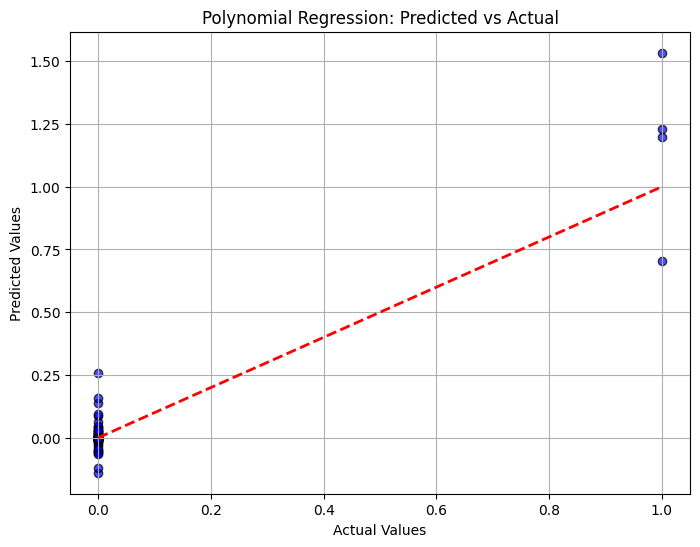

In [7]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Predicted vs Actual')
plt.grid(True)
plt.show()